In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

6 millions ratings are a bit too much to work with on a laptop since it would take forever for the model to fit. And so we will have to make a smaller dataset from this big dataset.

In [4]:
# Import the data
books = pd.read_csv('./data/books.csv')
ratings = pd.read_csv('./data/ratings.csv')

In [5]:
ratings.shape

(5976479, 3)

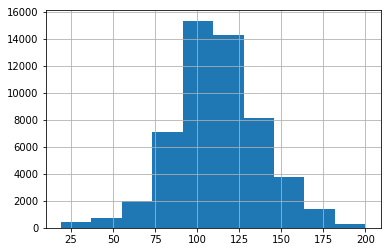

In [7]:
# The distribution of how many books each user has rated
ratings.groupby('user_id').size().hist()

The simplest way to cut the size of the ratings down is to cut the number of users down. This way we won't have to deal with the problem of users having too little ratings when using other methods of sampling.

In [8]:
# The number of users
len(ratings.user_id.unique())

53424

50k users with 6 millions ratings. My laptop could only handle around 100k ratings so the users should be cut down ~60 times. So we will cut the number of users down to 1k.

In [14]:
np.random.seed(42)
users_to_keep = np.random.choice(ratings.user_id.unique(), 1_000, replace=False)
len(users_to_keep)

1000

In [13]:
ratings_small = ratings[ratings.user_id.isin(users_to_keep)]
ratings_small.shape

(112160, 3)

~110k ratings as expected

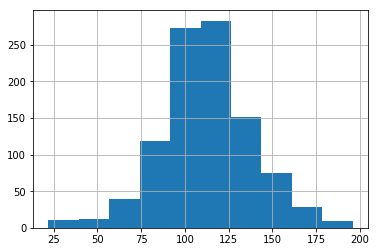

In [16]:
ratings_small.groupby('user_id').size().hist()

The distribution also didn't change much as expected

In [17]:
# The number of books rated
len(ratings_small.book_id.unique())

9590

We lost about ~400 books but the final result is acceptable. The only concern we have is that the dataset changed from having more users than books (50k compared to 10k) to having more books than users (1k compared to 9.5k). This shouldn't be a huge problem but we'll have to see.

For our simple recommender system (for now) we probably won't have to user tags, book tags or to reads, so we'll only update the books and ratings datasets for now.

In [25]:
books_to_keep = ratings_small.book_id.unique()
books_small = books[books.book_id.isin(books_to_keep)]
books_small.shape

(9590, 23)

In [36]:
# And then save them as feather for speed
books_small.reset_index().drop(['index'], axis=1).to_feather('data/books_small')
ratings_small.reset_index().drop(['index'], axis=1).to_feather('data/ratings_small')